In [1]:
!pip install mediapipe opencv-python numpy matplotlib --upgrade


  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.


In [1]:
!pip install --upgrade numpy==1.23.5 mediapipe opencv-python matplotlib



  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.


Image Upload + Face Landmark Detection

Saving pic.jpeg to pic.jpeg
📸 Loading image: pic.jpeg


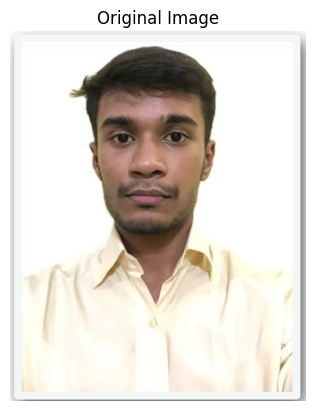

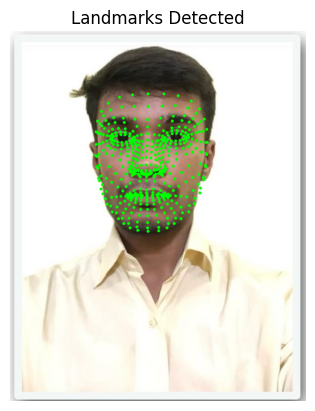

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
import os
from google.colab import files

# Upload image from local system
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get filename

# Check if file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"❌ The file '{image_path}' was not found.")

print(f"📸 Loading image: {image_path}")

# Load and display image
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image could not be read. Please check the file format and path.")

# Convert BGR to RGB for display and Mediapipe
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display original image
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Original Image")
plt.show()

# Initialize Mediapipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
with mp_face_mesh.FaceMesh(static_image_mode=True,
                           max_num_faces=1,
                           min_detection_confidence=0.5) as face_mesh:

    results = face_mesh.process(rgb_image)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            for landmark in face_landmarks.landmark:
                h, w, _ = image.shape
                x, y = int(landmark.x * w), int(landmark.y * h)
                cv2.circle(image, (x, y), 3, (0, 255, 0), -1)
    else:
        print("⚠️ No face landmarks detected.")

# Show image with landmarks
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Landmarks Detected")
plt.show()


Video Upload + Landmark Extraction

🎥 Loading video: vid1.mp4


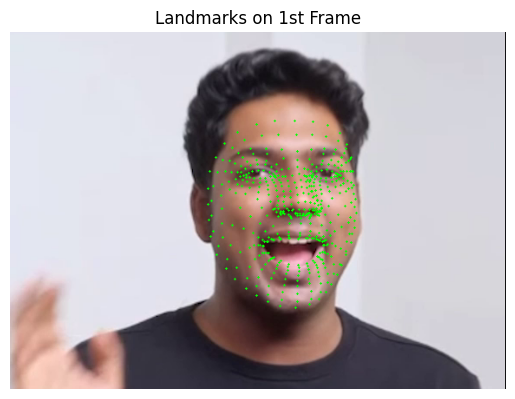

✅ Processed 142 frames with landmark detection.


In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import os


video_path = 'vid1.mp4'

# Check if video file exists
if not os.path.exists(video_path):
    raise FileNotFoundError(f"❌ The file '{video_path}' was not found.")

print(f"🎥 Loading video: {video_path}")

# Initialize Mediapipe face mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh_video = mp_face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Open video
cap = cv2.VideoCapture(video_path)
frame_landmarks = []

frame_count = 0

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    frame_count += 1
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh_video.process(rgb_frame)

    frame_points = []

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            for landmark in face_landmarks.landmark:
                h, w, _ = frame.shape
                x, y = int(landmark.x * w), int(landmark.y * h)
                frame_points.append((x, y))
                # Optional: draw landmark
                cv2.circle(frame, (x, y), 1, (0, 255, 0), -1)

    frame_landmarks.append(frame_points)

    # Optional: visualize only the first frame
    if frame_count == 1:
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Landmarks on 1st Frame")
        plt.show()

cap.release()
print(f"✅ Processed {frame_count} frames with landmark detection.")


Face Swapping

In [ ]:
pip install numpy==1.26.4


  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [ ]:
pip install scikit-image


  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 207.1 kB/s eta 0:01:00
   - ---------------

In [ ]:
pip install tqdm


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from tqdm import tqdm

# Get total number of frames for the progress bar
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
pbar = tqdm(total=total_frames, desc="Processing Frames")

# Ensure debug_frames directory exists
os.makedirs("debug_frames", exist_ok=True)

# Get video width, height, and fps
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output_swapped.mp4', fourcc, fps, (frame_width, frame_height))

frame_idx = 0


while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    h, w, _ = frame.shape  # Ensure h and w are updated per frame
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = mp_face_mesh_video.process(rgb)

    if results.multi_face_landmarks:
        dst_landmarks = results.multi_face_landmarks[0]

        dst_points = np.array([
            (int(dst_landmarks.landmark[i].x * w), int(dst_landmarks.landmark[i].y * h))
            for i in landmark_indices
        ])

        # Initialize blank mask
        mask = np.zeros_like(frame)

        # Warp each triangle from source to destination
        for tri in triangles:
            src_tri = np.float32([src_points[i] for i in tri])
            dst_tri = np.float32([dst_points[i] for i in tri])

            M = cv2.getAffineTransform(src_tri, dst_tri)

            triangle_mask = np.zeros((h, w), dtype=np.uint8)
            cv2.fillConvexPoly(triangle_mask, np.int32(dst_tri), 255)

            warped = cv2.warpAffine(src_img, M, (w, h))

            for i in range(3):  # B, G, R channels
                mask[:, :, i] = np.where(triangle_mask == 255, warped[:, :, i], mask[:, :, i])

        # Save debug images (optional)
        cv2.imwrite(f"debug_frames/warped_{frame_idx:03d}.jpg", mask)
        debug_overlay = cv2.addWeighted(frame, 0.7, mask, 0.3, 0)
        cv2.imwrite(f"debug_frames/mask_overlay_{frame_idx:03d}.jpg", debug_overlay)

        # Find center of mask for seamless cloning
        center = tuple(np.mean(dst_points, axis=0).astype(int))

        # Generate seamless face swap output
        output = cv2.seamlessClone(mask, frame, (mask[:, :, 0] > 0).astype(np.uint8) * 255, center, cv2.MIXED_CLONE)
        out.write(output)

    else:
        # If no face detected, write original frame
        out.write(frame)

    frame_idx += 1
    pbar.update(1)

# Cleanup
cap.release()
out.release()
pbar.close()
print("✅ Face swap completed and saved as 'output_swapped.avi'")


Processing Frames: 0it [00:00, ?it/s]

✅ Face swap completed and saved as 'output_swapped.avi'


In [ ]:
from google.colab import files
files.download('output_swapped.avi')


GAN TRAINING

1. Dataset

1.1 Kaggle Setup


In [ ]:
import os
import shutil

# Create the directory if it doesn't exist
kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Move the kaggle.json file into the .kaggle directory
shutil.copy("kaggle.json", kaggle_dir)

# Set permissions (Windows usually doesn't need chmod, but we include it safely)
kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")
os.chmod(kaggle_json_path, 0o600)

print("✅ kaggle.json is now in ~/.kaggle with appropriate permissions.")


✅ kaggle.json is now in ~/.kaggle with appropriate permissions.


In [ ]:
!pip install kaggle


  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
Using cached bleach-6.2.0-py3-none-any.whl (163 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cache

In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset

!unzip -q -o celeba-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other


'unzip' is not recognized as an internal or external command,
operable program or batch file.


Preprocessing The CelebA Dataset

In [ ]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Optimized transforms for your hardware
transform = transforms.Compose([
    transforms.Resize(64),  # Slightly faster than (64,64)
    transforms.CenterCrop(64),
    transforms.RandomHorizontalFlip(p=0.5),  # Simple but effective augmentation
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Dataset path
dataset_path = r"C:\Users\pc\Desktop\Minor Project2\celeba-dataset\img_align_celeba\img_align_celeba"

# Optimized DataLoader settings
num_workers = 6  # Ryzen 5 3600 has 6 cores (12 threads)
batch_size = 64   # Start with this, adjust based on VRAM usage

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=True,  # Faster data transfer to GPU
    persistent_workers=True  # Maintains worker pool
)

Defining Generator

In [ ]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            # input: latent_dim x 1 x 1
            nn.ConvTranspose2d(latent_dim, 512, 4, 1, 0, bias=False),  # 4x4
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),  # 8x8
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),  # 16x16
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),  # 32x32
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),  # 64x64
            nn.Tanh()  # output in range [-1, 1]
        )

    def forward(self, x):
        return self.gen(x)


Defining Discriminator

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            # input: 3 x 64 x 64
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),  # 32x32
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),  # 16x16
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),  # 8x8
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),  # 4x4
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, 1, 0, bias=False),  # 1x1
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x)


Setup Training

->Imports and Device Setup

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


->Hyperparameters

In [ ]:
image_size = 64
batch_size = 128
latent_dim = 100
epochs = 50
lr = 0.0002
beta1 = 0.5


-> Data Preprocessing & Loader

In [ ]:
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # Normalize to [-1, 1]
])

dataset = torchvision.datasets.ImageFolder(root=r"C:\Users\pc\Desktop\Minor Project2\celeba-dataset\img_align_celeba", transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)


-> Initialize Models

In [ ]:
netG = Generator(latent_dim).to(device)
netD = Discriminator().to(device)

# Weight initialization as per DCGAN paper
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

netG.apply(weights_init)
netD.apply(weights_init)


Discriminator(
  (disc): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

->Optimizers & Loss

In [ ]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))


->Sample Noise Vector for Monitoring

In [ ]:
fixed_noise = torch.randn(64, latent_dim, 1, 1, device=device)


TRAINING LOOP

In [ ]:
!pip install sympy --quiet


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from tqdm import tqdm
import os

# ✅ Hyperparameters
batch_size = 64
image_size = 64
noise_dim = 100
lr = 0.0002
epochs = 100
beta1 = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Resume Training Option
start_from_checkpoint = True  # Set to True to resume from last checkpoint
checkpoint_path = "checkpoints/gan_epoch_50.pth"  # Update this path as needed
start_epoch = 50

# ✅ Create output directories
os.makedirs('generated_images', exist_ok=True)
os.makedirs('checkpoints', exist_ok=True)

# ✅ Transforms
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ✅ Dataset path
dataset = datasets.ImageFolder(
    root=r"C:\Users\pc\Desktop\Minor Project2\celeba-dataset\img_align_celeba",
    transform=transform
)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# ✅ Generator
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            nn.ConvTranspose2d(noise_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.gen(x.view(x.size(0), noise_dim, 1, 1))

# ✅ Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x).view(-1, 1)

# ✅ Weight Initialization
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# ✅ Models
netG = Generator(noise_dim).to(device)
netD = Discriminator().to(device)

optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))

# ✅ Load Checkpoint (Optional)
if start_from_checkpoint and os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=device)
    netG.load_state_dict(checkpoint['generator_state_dict'])
    netD.load_state_dict(checkpoint['discriminator_state_dict'])
    optimizerG.load_state_dict(checkpoint['optimizer_G_state_dict'])
    optimizerD.load_state_dict(checkpoint['optimizer_D_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"✅ Resuming from epoch {start_epoch}")
else:
    netG.apply(weights_init)
    netD.apply(weights_init)

# ✅ Loss function
criterion = nn.BCELoss()

# ✅ Fixed noise for consistent image samples
fixed_noise = torch.randn(25, noise_dim, device=device)

# ✅ Training
for epoch in range(start_epoch, epochs):
    netG.train()
    netD.train()
    progress = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

    for i, (real_imgs, _) in enumerate(progress):
        real_imgs = real_imgs.to(device)
        b_size = real_imgs.size(0)

        # ==== Add input noise ====
        real_imgs += 0.05 * torch.randn_like(real_imgs)

        # ==== Labels with smoothing ====
        real_labels = torch.empty(b_size, 1, device=device).uniform_(0.8, 1.0)
        fake_labels = torch.zeros(b_size, 1, device=device)

        # ==== Label flipping (5% chance) ====
        if torch.rand(1).item() < 0.05:
            real_labels, fake_labels = fake_labels, real_labels

        # ==== Train Discriminator ====
        z = torch.randn(b_size, noise_dim, device=device)
        fake_imgs = netG(z).detach()

        # Add input noise to fake images too
        fake_imgs += 0.05 * torch.randn_like(fake_imgs)

        real_loss = criterion(netD(real_imgs), real_labels)
        fake_loss = criterion(netD(fake_imgs), fake_labels)
        d_loss = real_loss + fake_loss

        optimizerD.zero_grad()
        d_loss.backward()
        optimizerD.step()

        # ==== Train Generator ====
        z = torch.randn(b_size, noise_dim, device=device)
        fake_imgs = netG(z)

        # Use real_labels here (without flipping again)
        smooth_real_labels = torch.empty(b_size, 1, device=device).uniform_(0.8, 1.0)
        g_loss = criterion(netD(fake_imgs), smooth_real_labels)

        optimizerG.zero_grad()
        g_loss.backward()
        optimizerG.step()

        progress.set_postfix(D_Loss=d_loss.item(), G_Loss=g_loss.item())

    # ✅ Save sample image
    with torch.no_grad():
        netG.eval()
        sample_imgs = netG(fixed_noise)
        save_image(sample_imgs, f"generated_images/fake_epoch_{epoch+1}.png", nrow=5, normalize=True)

    # ✅ Save checkpoint
    torch.save({
        'epoch': epoch,
        'generator_state_dict': netG.state_dict(),
        'discriminator_state_dict': netD.state_dict(),
        'optimizer_G_state_dict': optimizerG.state_dict(),
        'optimizer_D_state_dict': optimizerD.state_dict()
    }, f"checkpoints/gan_epoch_{epoch+1}.pth")

print("✅ Training complete. Check the 'generated_images/' and 'checkpoints/' folders.")



C:\Users\pc\AppData\Local\Temp\ipykernel_8556\2786156734.py:116: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)


✅ Resuming from epoch 50


Epoch 73/100:  28%|██████████▎                          | 878/3166 [01:49<04:23,  8.69it/s, D_Loss=0.358, G_Loss=0.332]

To check for one output face

In [ ]:
import torch
from torchvision.utils import save_image
import os

# ✅ Hyperparameters (must match your training)
noise_dim = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Generator definition (must match exactly)
class Generator(torch.nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.gen = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(noise_dim, 512, 4, 1, 0, bias=False),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(True),

            torch.nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(True),

            torch.nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(True),

            torch.nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(True),

            torch.nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            torch.nn.Tanh()
        )

    def forward(self, x):
        return self.gen(x.view(x.size(0), noise_dim, 1, 1))

# ✅ Load Generator
netG = Generator(noise_dim).to(device)
checkpoint_path = "checkpoints/gan_epoch_72.pth"  # 👈 Your 72nd epoch checkpoint
checkpoint = torch.load(checkpoint_path, map_location=device)
netG.load_state_dict(checkpoint['generator_state_dict'])
netG.eval()

# ✅ Generate an image
os.makedirs('sample_output', exist_ok=True)
fixed_noise = torch.randn(1, noise_dim, device=device)
with torch.no_grad():
    fake_images = netG(fixed_noise)
    save_image(fake_images, 'sample_output/test_generated.png', normalize=True)

print("✅ Sample image saved at 'sample_output/test_generated.png'")


✅ Sample image saved at 'sample_output/test_generated.png'


New Training Loop

C:\Users\pc\AppData\Local\Temp\ipykernel_13880\193815163.py:202: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_images.append(imageio.imread(img_path))
                                                                                                                       

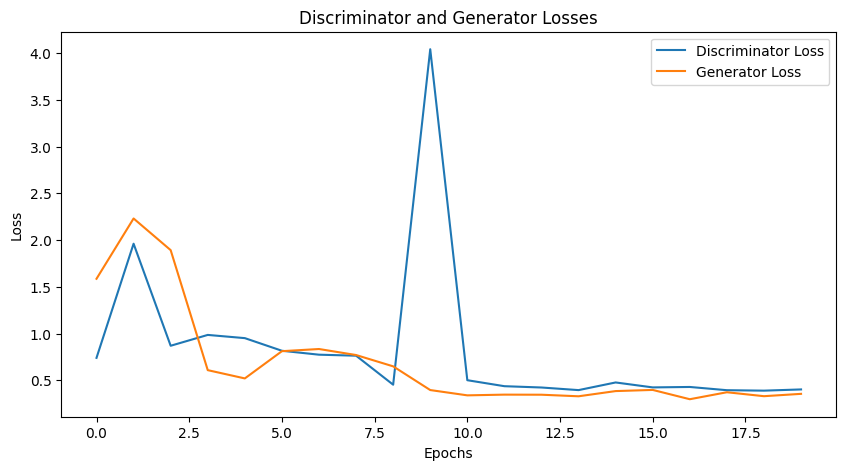

✅ Training complete. Check the 'generated_images/' and 'checkpoints/' folders.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import imageio

# ✅ Hyperparameters
batch_size = 64
image_size = 64
noise_dim = 100
lr = 0.0002
epochs = 20
beta1 = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Resume Training Option
start_from_checkpoint = True  # Set to True to resume from last checkpoint
checkpoint_path = "checkpoints/gan_epoch_50.pth"  # Update this path as needed
start_epoch = 0

# ✅ Create output directories
os.makedirs('generated_images', exist_ok=True)
os.makedirs('checkpoints', exist_ok=True)

# ✅ Transforms
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ✅ Dataset path
dataset = datasets.ImageFolder(
    root=r"C:\Users\pc\Desktop\Minor Project2\celeba-dataset\img_align_celeba",
    transform=transform
)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# ✅ Generator
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            nn.ConvTranspose2d(noise_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.gen(x.view(x.size(0), noise_dim, 1, 1))

# ✅ Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x).view(-1, 1)

# ✅ Weight Initialization
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# ✅ Models
netG = Generator(noise_dim).to(device)
netD = Discriminator().to(device)

optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))

# ✅ Load Checkpoint (Optional)
if start_from_checkpoint and os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=device)
    netG.load_state_dict(checkpoint['generator_state_dict'])
    netD.load_state_dict(checkpoint['discriminator_state_dict'])
    optimizerG.load_state_dict(checkpoint['optimizer_G_state_dict'])
    optimizerD.load_state_dict(checkpoint['optimizer_D_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"✅ Resuming from epoch {start_epoch}")
else:
    netG.apply(weights_init)
    netD.apply(weights_init)

# ✅ Loss function
criterion = nn.BCELoss()

# ✅ Fixed noise for consistent image samples
fixed_noise = torch.randn(25, noise_dim, device=device)

# ✅ Lists to store losses for plotting
d_losses = []
g_losses = []

# ✅ Training
gif_images = []
for epoch in range(start_epoch, epochs):
    netG.train()
    netD.train()
    progress = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

    for i, (real_imgs, _) in enumerate(progress):
        real_imgs = real_imgs.to(device)
        b_size = real_imgs.size(0)

        # ==== Add input noise ====
        real_imgs += 0.05 * torch.randn_like(real_imgs)

        # ==== Labels with smoothing ====
        real_labels = torch.empty(b_size, 1, device=device).uniform_(0.8, 1.0)
        fake_labels = torch.zeros(b_size, 1, device=device)

        # ==== Label flipping (5% chance) ====
        if torch.rand(1).item() < 0.05:
            real_labels, fake_labels = fake_labels, real_labels

        # ==== Train Discriminator ====
        z = torch.randn(b_size, noise_dim, device=device)
        fake_imgs = netG(z).detach()

        # Add input noise to fake images too
        fake_imgs += 0.05 * torch.randn_like(fake_imgs)

        real_loss = criterion(netD(real_imgs), real_labels)
        fake_loss = criterion(netD(fake_imgs), fake_labels)
        d_loss = real_loss + fake_loss

        optimizerD.zero_grad()
        d_loss.backward()
        optimizerD.step()

        # ==== Train Generator ====
        z = torch.randn(b_size, noise_dim, device=device)
        fake_imgs = netG(z)

        # Use real_labels here (without flipping again)
        smooth_real_labels = torch.empty(b_size, 1, device=device).uniform_(0.8, 1.0)
        g_loss = criterion(netD(fake_imgs), smooth_real_labels)

        optimizerG.zero_grad()
        g_loss.backward()
        optimizerG.step()

        progress.set_postfix(D_Loss=d_loss.item(), G_Loss=g_loss.item())

    # Store losses
    d_losses.append(d_loss.item())
    g_losses.append(g_loss.item())

    # ✅ Save sample image
    with torch.no_grad():
        netG.eval()
        sample_imgs = netG(fixed_noise)
        img_path = f"generated_images/fake_epoch_{epoch+1}.png"
        save_image(sample_imgs, img_path, nrow=5, normalize=True)

        # Append image to GIF list
        gif_images.append(imageio.imread(img_path))

    # ✅ Save checkpoint
    torch.save({
        'epoch': epoch,
        'generator_state_dict': netG.state_dict(),
        'discriminator_state_dict': netD.state_dict(),
        'optimizer_G_state_dict': optimizerG.state_dict(),
        'optimizer_D_state_dict': optimizerD.state_dict()
    }, f"checkpoints/gan_epoch_{epoch+1}.pth")

# ✅ Plot Losses
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), d_losses, label='Discriminator Loss')
plt.plot(range(epochs), g_losses, label='Generator Loss')
plt.title('Discriminator and Generator Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot.png')  # Save the plot as an image
plt.show()

# ✅ Create GIF from generated images
imageio.mimsave('generated_images/generation_progress.gif', gif_images, duration=0.5)

print("✅ Training complete. Check the 'generated_images/' and 'checkpoints/' folders.")


In [ ]:
Training epoch 35-45, Beta 0.4 lr 0.0001

C:\Users\pc\AppData\Local\Temp\ipykernel_3488\1042421481.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)


✅ Resuming from epoch 35


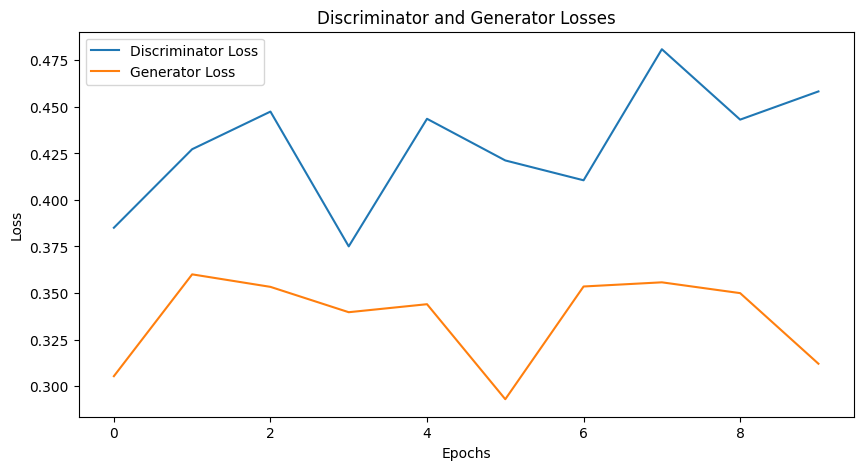

✅ Training complete. Check the 'generated_images/' and 'checkpoints/' folders.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import imageio.v2 as imageio

# ✅ Hyperparameters
batch_size = 64
image_size = 64
noise_dim = 100
lr = 0.0001
epochs = 50
beta1 = 0.4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Resume Training Option
start_from_checkpoint = True  # Set to True to resume from last checkpoint
checkpoint_path = "checkpoints/gan_epoch_45.pth"  # Update this path as needed
start_epoch = 45

# ✅ Create output directories
os.makedirs('generated_images', exist_ok=True)
os.makedirs('checkpoints', exist_ok=True)

# ✅ Transforms
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ✅ Dataset path
dataset = datasets.ImageFolder(
    root=r"C:\Users\pc\Desktop\Minor Project2\celeba-dataset\img_align_celeba",
    transform=transform
)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# ✅ Generator
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            nn.ConvTranspose2d(noise_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.gen(x.view(x.size(0), noise_dim, 1, 1))

# ✅ Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x).view(-1, 1)

# ✅ Weight Initialization
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# ✅ Models
netG = Generator(noise_dim).to(device)
netD = Discriminator().to(device)

optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))

# ✅ Load Checkpoint (Optional)
if start_from_checkpoint and os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=device)
    netG.load_state_dict(checkpoint['generator_state_dict'])
    netD.load_state_dict(checkpoint['discriminator_state_dict'])
    optimizerG.load_state_dict(checkpoint['optimizer_G_state_dict'])
    optimizerD.load_state_dict(checkpoint['optimizer_D_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"✅ Resuming from epoch {start_epoch}")
else:
    netG.apply(weights_init)
    netD.apply(weights_init)

# ✅ Loss function
criterion = nn.BCELoss()

# ✅ Fixed noise for consistent image samples
fixed_noise = torch.randn(25, noise_dim, device=device)

# ✅ Lists to store losses for plotting
d_losses = []
g_losses = []

# ✅ Training
gif_images = []
for epoch in range(start_epoch, epochs):
    netG.train()
    netD.train()
    progress = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

    for i, (real_imgs, _) in enumerate(progress):
        real_imgs = real_imgs.to(device)
        b_size = real_imgs.size(0)

        # ==== Add input noise ====
        real_imgs += 0.05 * torch.randn_like(real_imgs)

        # ==== Labels with smoothing ====
        real_labels = torch.empty(b_size, 1, device=device).uniform_(0.8, 1.0)
        fake_labels = torch.zeros(b_size, 1, device=device)

        # ==== Label flipping (5% chance) ====
        if torch.rand(1).item() < 0.05:
            real_labels, fake_labels = fake_labels, real_labels

        # ==== Train Discriminator ====
        z = torch.randn(b_size, noise_dim, device=device)
        fake_imgs = netG(z).detach()

        # Add input noise to fake images too
        fake_imgs += 0.05 * torch.randn_like(fake_imgs)

        real_loss = criterion(netD(real_imgs), real_labels)
        fake_loss = criterion(netD(fake_imgs), fake_labels)
        d_loss = real_loss + fake_loss

        optimizerD.zero_grad()
        d_loss.backward()
        optimizerD.step()

        # ==== Train Generator ====
        z = torch.randn(b_size, noise_dim, device=device)
        fake_imgs = netG(z)

        # Use real_labels here (without flipping again)
        smooth_real_labels = torch.empty(b_size, 1, device=device).uniform_(0.8, 1.0)
        g_loss = criterion(netD(fake_imgs), smooth_real_labels)

        optimizerG.zero_grad()
        g_loss.backward()
        optimizerG.step()

        progress.set_postfix(D_Loss=d_loss.item(), G_Loss=g_loss.item())

    # Store losses
    d_losses.append(d_loss.item())
    g_losses.append(g_loss.item())

    # ✅ Save sample image
    with torch.no_grad():
        netG.eval()
        sample_imgs = netG(fixed_noise)
        img_path = f"generated_images/fake_epoch_{epoch+1}.png"
        save_image(sample_imgs, img_path, nrow=5, normalize=True)

        # Append image to GIF list
        gif_images.append(imageio.imread(img_path))

    # ✅ Save checkpoint
    torch.save({
        'epoch': epoch,
        'generator_state_dict': netG.state_dict(),
        'discriminator_state_dict': netD.state_dict(),
        'optimizer_G_state_dict': optimizerG.state_dict(),
        'optimizer_D_state_dict': optimizerD.state_dict()
    }, f"checkpoints/gan_epoch_{epoch+1}.pth")

# ✅ Plot Losses
plt.figure(figsize=(10, 5))
plt.plot(range(len(d_losses)), d_losses, label='Discriminator Loss')
plt.plot(range(len(g_losses)), g_losses, label='Generator Loss')
plt.title('Discriminator and Generator Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot.png')  # Save the plot as an image
plt.show()

# ✅ Create GIF from generated images
imageio.mimsave('generated_images/generation_progress.gif', gif_images, duration=0.5)

print("✅ Training complete. Check the 'generated_images/' and 'checkpoints/' folders.")

In [ ]:
import torch
from torchvision.utils import save_image
import os

# ✅ Hyperparameters
noise_dim = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Generator architecture (same as your training script)
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            nn.ConvTranspose2d(noise_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.gen(x.view(x.size(0), noise_dim, 1, 1))

# ✅ Load Generator
netG = Generator(noise_dim).to(device)

checkpoint_path = "checkpoints/gan_epoch_45.pth"  # ✅ Path to your 21st epoch checkpoint

# Load the checkpoint
checkpoint = torch.load(checkpoint_path, map_location=device)
netG.load_state_dict(checkpoint['generator_state_dict'])
netG.eval()

# ✅ Generate one image
z = torch.randn(1, noise_dim, device=device)
with torch.no_grad():
    fake_image = netG(z)

# ✅ Save the generated image
os.makedirs('generated_single', exist_ok=True)
save_image(fake_image, "generated_single/fake_image_epoch45.png", normalize=True)

print("✅ One image generated and saved to 'generated_single/fake_image_epoch45.png'")


✅ One image generated and saved to 'generated_single/fake_image_epoch45.png'


C:\Users\pc\AppData\Local\Temp\ipykernel_3488\3683198133.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)


GIF Generator

In [ ]:
from PIL import Image, ImageDraw, ImageFont

# Create a list to hold all frames
frames = []

# Optional: Load a font (or default if font not available)
try:
    font = ImageFont.truetype("arial.ttf", 10)  # You can adjust font size
except IOError:
    font = ImageFont.load_default()

# Load all frames and add text
for i in range(1, 45):  # from 5 to 49 inclusive
    frame = Image.open(f'generated_images/fake_epoch_{i}.png').convert('RGBA')

    # Make a drawable image
    txt = Image.new('RGBA', frame.size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(txt)

    # Draw the frame number at top-left (you can adjust position)
    draw.text((10, 10), f"{i}", font=font, fill=(255, 0, 0, 255))  # Red color

    # Combine frame and text overlay
    combined = Image.alpha_composite(frame, txt).convert('RGB')

    frames.append(combined)

# Save as GIF
frames[0].save(
    'output_with_numbers.gif',
    save_all=True,
    append_images=frames[1:],
    duration=100,  # 100ms per frame
    loop=0         # infinite loop
)

print("GIF with numbers created successfully!")

GIF with numbers created successfully!


Epoch 45-135 training with beta 0.4

C:\Users\pc\AppData\Local\Temp\ipykernel_20436\3024493549.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)

✅ Resuming from epoch 45


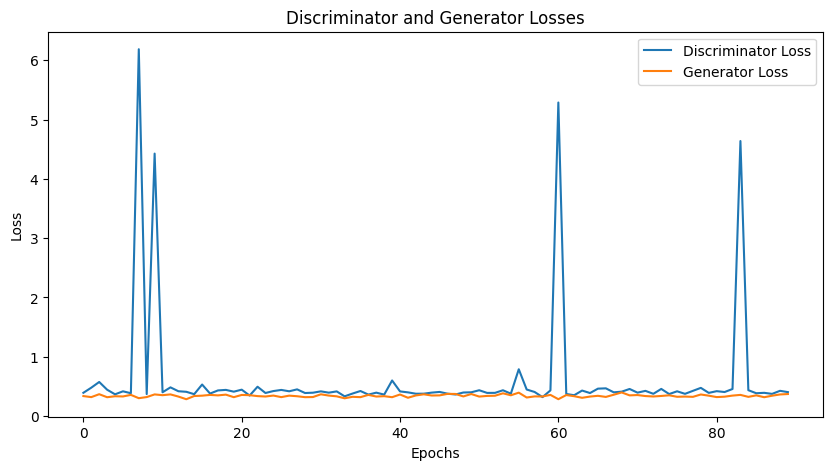

✅ Training complete. Check the 'generated_images/' and 'checkpoints/' folders.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import imageio.v2 as imageio

# ✅ Hyperparameters
batch_size = 64
image_size = 64
noise_dim = 100
lr = 0.0001
epochs = 135
beta1 = 0.375
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Resume Training Option
start_from_checkpoint = True  # Set to True to resume from last checkpoint
checkpoint_path = "checkpoints/gan_epoch_45.pth"  # Update this path as needed
start_epoch = 45

# ✅ Create output directories
os.makedirs('generated_images', exist_ok=True)
os.makedirs('checkpoints', exist_ok=True)

# ✅ Transforms
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ✅ Dataset path
dataset = datasets.ImageFolder(
    root=r"C:\Users\pc\Desktop\Minor Project2\celeba-dataset\img_align_celeba",
    transform=transform
)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# ✅ Generator
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            nn.ConvTranspose2d(noise_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.gen(x.view(x.size(0), noise_dim, 1, 1))

# ✅ Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x).view(-1, 1)

# ✅ Weight Initialization
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# ✅ Models
netG = Generator(noise_dim).to(device)
netD = Discriminator().to(device)

optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))

# ✅ Load Checkpoint (Optional)
if start_from_checkpoint and os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=device)
    netG.load_state_dict(checkpoint['generator_state_dict'])
    netD.load_state_dict(checkpoint['discriminator_state_dict'])
    optimizerG.load_state_dict(checkpoint['optimizer_G_state_dict'])
    optimizerD.load_state_dict(checkpoint['optimizer_D_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"✅ Resuming from epoch {start_epoch}")
else:
    netG.apply(weights_init)
    netD.apply(weights_init)

# ✅ Loss function
criterion = nn.BCELoss()

# ✅ Fixed noise for consistent image samples
fixed_noise = torch.randn(25, noise_dim, device=device)

# ✅ Lists to store losses for plotting
d_losses = []
g_losses = []

# ✅ Training
gif_images = []
for epoch in range(start_epoch, epochs):
    netG.train()
    netD.train()
    progress = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

    for i, (real_imgs, _) in enumerate(progress):
        real_imgs = real_imgs.to(device)
        b_size = real_imgs.size(0)

        # ==== Add input noise ====
        real_imgs += 0.05 * torch.randn_like(real_imgs)

        # ==== Labels with smoothing ====
        real_labels = torch.empty(b_size, 1, device=device).uniform_(0.8, 1.0)
        fake_labels = torch.zeros(b_size, 1, device=device)

        # ==== Label flipping (5% chance) ====
        if torch.rand(1).item() < 0.05:
            real_labels, fake_labels = fake_labels, real_labels

        # ==== Train Discriminator ====
        z = torch.randn(b_size, noise_dim, device=device)
        fake_imgs = netG(z).detach()

        # Add input noise to fake images too
        fake_imgs += 0.05 * torch.randn_like(fake_imgs)

        real_loss = criterion(netD(real_imgs), real_labels)
        fake_loss = criterion(netD(fake_imgs), fake_labels)
        d_loss = real_loss + fake_loss

        optimizerD.zero_grad()
        d_loss.backward()
        optimizerD.step()

        # ==== Train Generator ====
        z = torch.randn(b_size, noise_dim, device=device)
        fake_imgs = netG(z)

        # Use real_labels here (without flipping again)
        smooth_real_labels = torch.empty(b_size, 1, device=device).uniform_(0.8, 1.0)
        g_loss = criterion(netD(fake_imgs), smooth_real_labels)

        optimizerG.zero_grad()
        g_loss.backward()
        optimizerG.step()

        progress.set_postfix(D_Loss=d_loss.item(), G_Loss=g_loss.item())

    # Store losses
    d_losses.append(d_loss.item())
    g_losses.append(g_loss.item())

    # ✅ Save sample image
    with torch.no_grad():
        netG.eval()
        sample_imgs = netG(fixed_noise)
        img_path = f"generated_images/fake_epoch_{epoch+1}.png"
        save_image(sample_imgs, img_path, nrow=5, normalize=True)

        # Append image to GIF list
        gif_images.append(imageio.imread(img_path))

    # ✅ Save checkpoint
    torch.save({
        'epoch': epoch,
        'generator_state_dict': netG.state_dict(),
        'discriminator_state_dict': netD.state_dict(),
        'optimizer_G_state_dict': optimizerG.state_dict(),
        'optimizer_D_state_dict': optimizerD.state_dict()
    }, f"checkpoints/gan_epoch_{epoch+1}.pth")

# ✅ Plot Losses
plt.figure(figsize=(10, 5))
plt.plot(range(len(d_losses)), d_losses, label='Discriminator Loss')
plt.plot(range(len(g_losses)), g_losses, label='Generator Loss')
plt.title('Discriminator and Generator Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot.png')  # Save the plot as an image
plt.show()

# ✅ Create GIF from generated images
imageio.mimsave('generated_images/generation_progress.gif', gif_images, duration=0.5)

print("✅ Training complete. Check the 'generated_images/' and 'checkpoints/' folders.")